In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
# import tab delimited text file, set delimiter to tab, to ignore double quotes set quoting to 3
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\UdemyExerciseML\\Machine Learning A-Z (Codes and Datasets)\\Part 7 - Natural Language Processing\\Section 36 - Natural Language Processing\\Python\\Restaurant_Reviews.tsv", delimiter = '\t', quoting = 3)

In [16]:
import re 
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
corpus = []
for i in range(0, 1000):
    review = re.sub("[^a-zA-Z]", " ", df["Review"][i]) # Remove all ponctuation and replace with a space
    review = review.lower() # turn everything to lower case
    review = review.split() # split review into all the different words
    ps = PorterStemmer()
    all_stopwords = stopwords.words("english")
    all_stopwords.remove("not")
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] # remove all non relevant words
    review = " ".join(review) # join all words with space inbetween
    corpus.append(review)

In [21]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) #extract most frequent words, adjust carefully, dont go too low
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [27]:
len(X[0])

1500

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = nb_clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

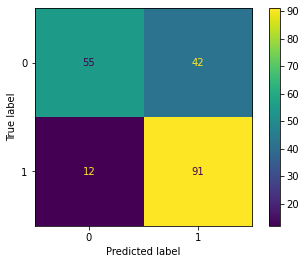

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_clf, X_test, y_test)